<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-06/blob/main/hw_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. Імпорт бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Для перевірки
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# 1. Функція гіпотези у векторному вигляді
def hypothesis(X, w):
    """
    X — матриця ознак (m x n)
    w — вектор параметрів (n x 1)
    return: y_pred (m x 1)
    """
    return X @ w


In [ ]:
# 2. Функція втрат (MSE у векторному вигляді)
def loss(X, y, w):
    m = len(y)
    y_pred = hypothesis(X, w)
    return (1/(2*m)) * np.sum((y_pred - y)**2)


In [ ]:
# 3. Один крок градієнтного спуску
def gradient_step(X, y, w, alpha):
    """
    X — матриця ознак
    y — вектор-ціль
    w — вектор ваг
    alpha — швидкість навчання
    """
    m = len(y)
    y_pred = hypothesis(X, w)
    gradient = (1/m) * (X.T @ (y_pred - y))
    w = w - alpha * gradient
    return w


In [ ]:
# 4. Навчання на датасеті (градієнтний спуск)
# Завантаження даних
url = "https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo"
df = pd.read_csv(url)

print(df.head())

# Припустимо, що є колонки: "area", "bedrooms", "bathrooms", "price"
X = df[["area", "bedrooms", "bathrooms"]].values
y = df["price"].values.reshape(-1, 1)

# Додаємо стовпець 1 для w0
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Ініціалізація
w = np.zeros((X.shape[1], 1))
alpha = 0.00000001
epochs = 1000

losses = []

for i in range(epochs):
    w = gradient_step(X, y, w, alpha)
    losses.append(loss(X, y, w))

print("Отримані коефіцієнти (градієнтний спуск):", w.ravel())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Отримані коефіцієнти (градієнтний спуск): [  3.73468893 855.70066076  14.05312415   7.85944397]


In [ ]:
# 5. Аналітичне рішення (нормальне рівняння)
w_normal = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Аналітичне рішення:", w_normal.ravel())


Аналітичне рішення: [-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


In [ ]:
# 6. Перевірка через scikit-learn
model = LinearRegression()
model.fit(X[:,1:], y)

print("Коефіцієнти sklearn:", model.coef_, "Інтерсепт:", model.intercept_)

# Порівняння прогнозів
y_pred_sklearn = model.predict(X[:,1:])
print("MSE (sklearn):", mean_squared_error(y, y_pred_sklearn))


Коефіцієнти sklearn: [[3.78762754e+02 4.06820034e+05 1.38604950e+06]] Інтерсепт: [-173171.60763264]
MSE (sklearn): 1791170049977.3193


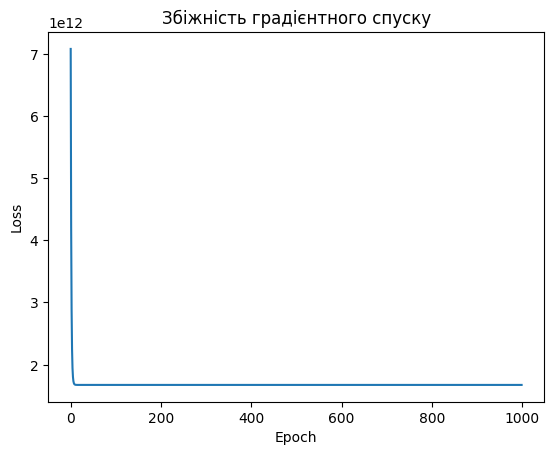

In [ ]:
# Візуалізація збіжності втрат
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Збіжність градієнтного спуску")
plt.show()
